# TP 5.2 : Étude de cas en imagerie

L'objectif de ce TP est de mettre en oeuvre des méthodes de statistique exploratoire sur un type particulier de données : une image.

## 1. Les données

Les images proposées dans le dossier `data/images` sont au format PNM et de de taille $512 \times 512$. Pour commencer, vous devez choisir une image et la charger à l'aide de la fonction `read.pnm()` du package `pixmap` (les erreurs peuvent être ignorées).

In [7]:
library(pixmap)

mon_image_fichier <- "data/images/Yacht_512.pnm"
mon_image <- read.pnm(mon_image_fichier)

L'image peut être affichée grâce à la fonction `plot()`.

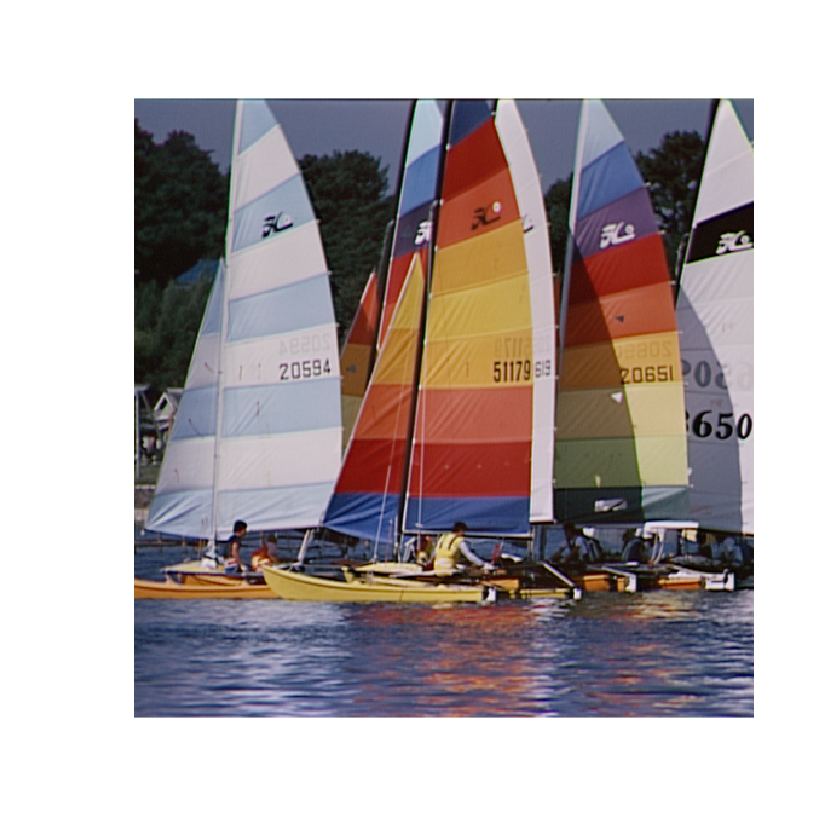

In [8]:
plot(mon_image)

L'objet `mon_image` est de classe `pixmapRGB` qui suit le formalisme objet S4. Ce détail technique est sans grande importance si ce n'est que l'accès aux composants de `mon_image` est différent du formalisme S3 habituel. Ainsi, nous pouvons lister les composants de l'objet avec la commande `slotNames()` au lieu de `names()` et accéder à ces composants avec l'opérateur `@` au lieu de `$`.

In [9]:
# Classe de l'objet
class(mon_image)

[1] "pixmapRGB"
attr(,"package")
[1] "pixmap"

In [10]:
# Liste des composants
slotNames(mon_image)

[1] "red"      "green"    "blue"     "channels" "size"     "cellres"  "bbox"    
[8] "bbcent"

In [11]:
# Accès aux composants
mon_image@size

[1] 512 512

## 2. Analyse 1D

Les analyses unidimensionnelle vont porter sur les valeurs de l'ensemble des  pixels de l'image dans chaque canal (*channel*). Nous pouvons par exemple travailler sur le canal rouge à partir de l'objet `mon_image_rouge` défini comme ci-dessous ainsi que sur les canaux vert et bleu.

In [12]:
mon_image_rouge <- as.vector(mon_image@red)
mon_image_vert <- as.vector(mon_image@green)
mon_image_bleu <- as.vector(mon_image@blue)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Calculer quelques statistiques élémentaires sur chaque canal de l'image initial à l'aide de <code>summary()</code>.</li>
        <li>Représenter en parallèle les 3 boxplots correspondant aux canaux de l'image.</li>
            <center><img src="img/image_rgb.png"></center>
        </li>
    </ol>
</div>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2824  0.4471  0.4610  0.6745  0.9294 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2314  0.3725  0.4002  0.6000  0.8980 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2039  0.4078  0.4083  0.5922  0.9647 

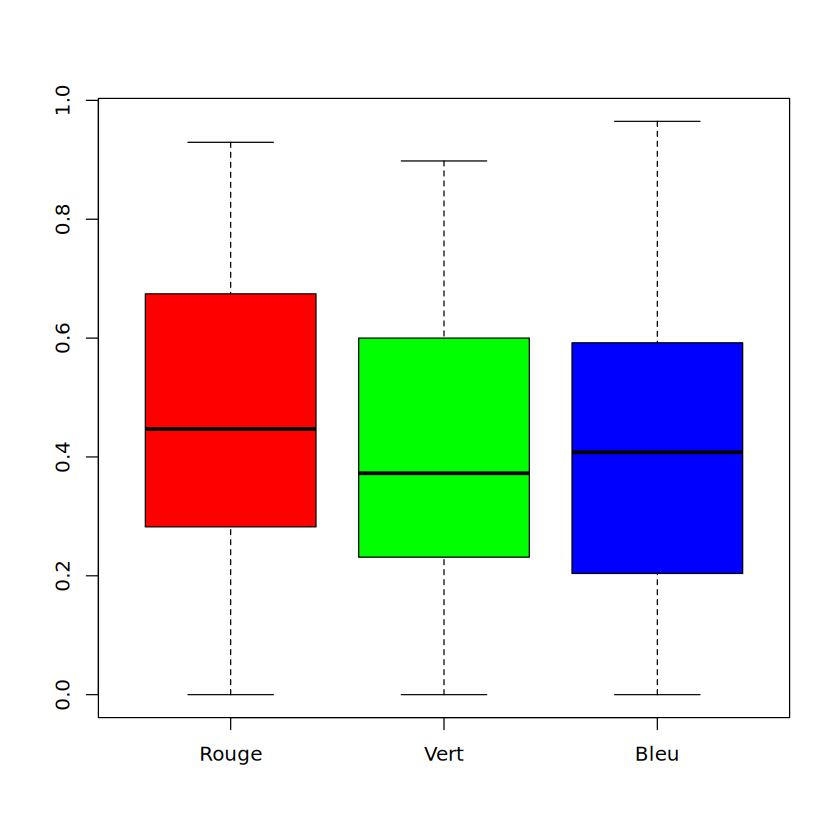

In [13]:
summary(mon_image_rouge)
summary(mon_image_vert)
summary(mon_image_bleu)

par(bg = "white")
boxplot(mon_image_rouge, mon_image_vert, mon_image_bleu,
        col = c('red', 'green', 'blue'),
        names = c("Rouge", "Vert", "Bleu"))


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>3 - Représenter les histogrammes avec <code>hist()</code> accompagnés d'une courbe de densité estimée par la fonction <code>density()</code>.<br>
        </li>
    </ol>
</div>

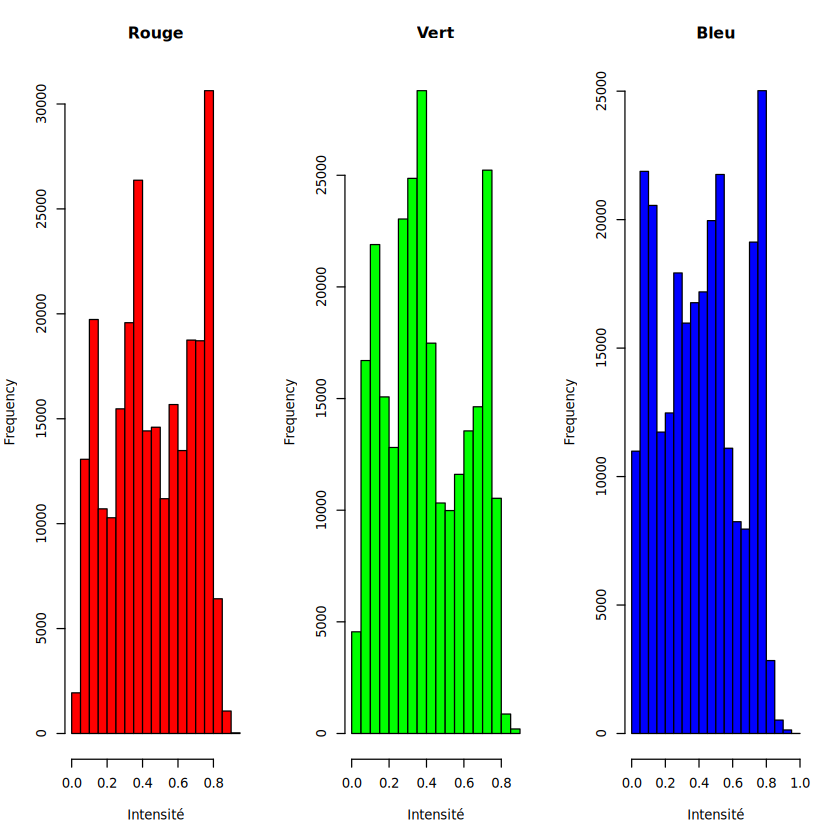

In [14]:
# Histogrammes côte à côte

par(bg = 'white')
par(mfrow = c(1,3))  # 1 ligne, 3 colonnes
hist(mon_image_rouge, col = 'red', main = "Rouge", xlab = "Intensité")
hist(mon_image_vert, col = 'green', main = "Vert", xlab = "Intensité")
hist(mon_image_bleu, col = 'blue', main = "Bleu", xlab = "Intensité")
par(mfrow = c(1,1))  # revenir à l'affichage normal


## 3. Analyse 2D

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter les nuages de points croisant les canaux deux à deux. Utiliser l'option <code>pch="."</code> de la fonction <code>plot()</code> pour alléger les graphiques.</li>
        <li>Calculer la matrice des corrélations linéaire de Pearson entre chaque canaux.</li>
    </ol>
    <center><img src="img/image_2d.png"></center>
</div>

Warning message:
“In mosaicplot.default(x, xlab = xlab, ylab = ylab, ...) :
 extra argument ‘pch’ will be disregarded”
Warning message:
“In mosaicplot.default(x, xlab = xlab, ylab = ylab, ...) :
 extra argument ‘pch’ will be disregarded”
Warning message:
“In mosaicplot.default(x, xlab = xlab, ylab = ylab, ...) :
 extra argument ‘pch’ will be disregarded”


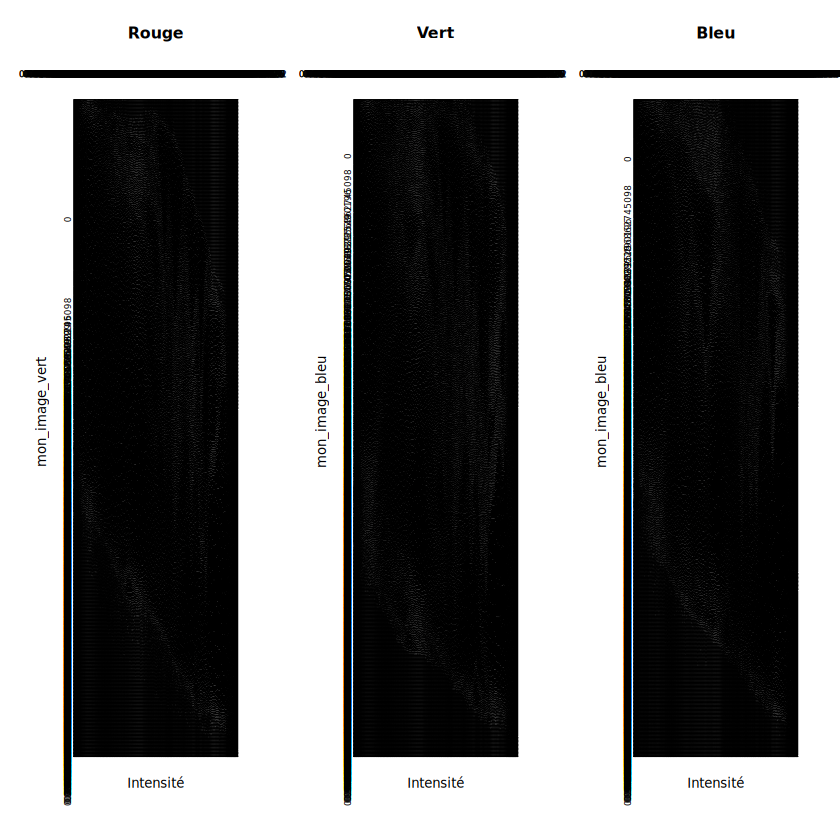

In [15]:
table_rougevert = table(mon_image_rouge, mon_image_vert)
table_rougebleu = table(mon_image_rouge, mon_image_bleu)
table_vertbleu = table(mon_image_vert, mon_image_bleu)

# Plots côte à côte

par(bg = 'white')
par(mfrow = c(1,3))  # 1 ligne, 3 colonnes
plot(table_rougevert,pch=".", col = 'red', main = "Rouge", xlab = "Intensité")
plot(table_rougebleu,pch=".", col = 'green', main = "Vert", xlab = "Intensité")
plot(table_vertbleu,pch=".", col = 'blue', main = "Bleu", xlab = "Intensité")
par(mfrow = c(1,1))  # revenir à l'affichage normal

## 4. Analyse multidimensionnelle

Dans cette section, nous supposons que les données sont stockées dans un `data.frame` à 3 colonnes (une colonne par canal) et n lignes (une ligne par pixel de l'image, soit 262144 pour une image de taille $512 \times 512$).

In [16]:
df_image <- data.frame(
    rouge = mon_image_rouge,
    vert  = mon_image_vert,
    bleu  = mon_image_bleu
)

cat("Dimensions du data frame :", dim(df_image))

Dimensions du data frame : 262144 3

### 4.1 Classification

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Procéder à une classification des pixels avec <code>kmeans()</code> à 2, 4 et 8 groupes et stocker les résultats dans <code>kmeans_image_2</code>, <code>kmeans_image_4</code> et <code>kmeans_image_8</code>, respectivement.</li>
        <li>Utiliser la fonction <code>pixmapGrey()</code> avec l'option <code>nrow=512</code> pour convertir les résultats de chaque classification en une image de niveaux de gris.</li>
        <li>Utiliser <code>plot()</code> pour visualiser ces images.</li>
        <li>Commenter la mise en oeuvre d'une méthode de classification sur une image. Comment pourrait-on définir un nombre de groupes raisonnable avant de procéder à un algorithme K-means comme décrit précédemment ?</li>
    </ol>
    <center><img src="img/image_cluster.png"></center>
</div>

In [17]:
# À FAIRE

### 4.1 Analyse en composantes principales

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer une ACP en utilisant la fonction <code>PCA()</code> de <code>FactoMineR</code> sans réduire les données (option <code>scale.unit=FALSE</code>).</li>
        <li>Expliquer pourquoi les données ne doivent pas être réduites.</li>
        <li>Le package <code>FactoMineR</code> dispose d'une fonction de reconstruction des données à partir des résultats d'une ACP. Par exemple, pour reconstruire l'image à partir de la première composante principale seulement, nous utiliserons l'option <code>ncp=1</code> de la fonction <code>reconst()</code>. Voici un exemple de code que vous pouvez reprendre pour repasser du format vectoriel à une matrice d'image en limitant les valeurs au segment $[0,1]$ grâce aux fonctions <code>pmin()</code> et <code>pmax()</code>.</li>
    </ol>
</div>

In [18]:
# Reconstruction à partir de la première composante principale
reconst_cp1 <- reconst(acp_image, ncp=1)

# Copie de l'image initiale
mon_image_cp1 <- mon_image

# Remplacement des canaux par la reconstruction
mon_image_cp1@red <- matrix(pmax(pmin(reconst_cp1[,1], 1), 0), 512, 512)
mon_image_cp1@green <- matrix(pmax(pmin(reconst_cp1[,2], 1), 0), 512, 512)
mon_image_cp1@blue <- matrix(pmax(pmin(reconst_cp1[,3], 1), 0), 512, 512)

# Affichage de l'image reconstruite
plot(mon_image_cp1)

ERROR: Error in reconst(acp_image, ncp = 1): could not find function "reconst"


<div class="alert alert-block alert-success">
    <ol start="4">
        <li>Utiliser le code ci-dessus pour reconstruire l'image à partir de 1, 2 et 3 composantes principales. Comparer les résultats à l'image initiale.</li>
        <li>Commenter les différentes manipulations réalisées autour de l'ACP. En quoi les résultats de la reconstruction illustrent-ils le principe de l'ACP ?</li>
    </ol>
</div>

In [ ]:
# À FAIRE